In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Set display options to show all columns
pd.set_option('display.max_columns', None)

# Set up white-grid plot style
sns.set_style("whitegrid")

# Optional: Set a color palette (you can choose a different one if you prefer)
sns.set_palette("deep")

CWD = os.getcwd()
print(f'CWD: {CWD}')

CWD: /data_analysis/Insurance/src


In [65]:
ROOT = os.path.dirname(CWD)
PATH = os.path.join(ROOT, 'data', 'train.csv')

train = pd.read_csv(PATH, low_memory=False, na_values='?', index_col='id')
train.sample(5)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
2492057,Male,53,1,41.0,0,1-2 Year,Yes,39182.0,124.0,113,0
4906225,Female,47,1,48.0,0,1-2 Year,No,2630.0,124.0,245,0
9999173,Male,24,1,8.0,0,< 1 Year,Yes,60526.0,12.0,297,0
3664357,Male,72,1,8.0,1,1-2 Year,No,76401.0,26.0,137,0
2813090,Male,34,1,28.0,0,1-2 Year,Yes,36996.0,124.0,56,1


In [73]:
train.shape

(11504798, 11)

In [67]:
target = 'Response'
num_cols = ['Age', 'Annual_Premium', 'Vintage']
cat_cols = ['Gender', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Damage', 'Policy_Sales_Channel']
ordinal_cols = ['Vehicle_Age']

train[cat_cols] = train[cat_cols].astype('category')
train[ordinal_cols] = train[ordinal_cols].astype('category')
train.describe(include='all')

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,11504798,1.150480e+07,11504798.0,11504798.0,11504798.0,11504798,11504798,1.150480e+07,11504798.0,1.150480e+07,1.150480e+07
unique,2,NaN,2.0,54.0,2.0,3,2,NaN,152.0,NaN,NaN
top,Male,NaN,1.0,28.0,0.0,1-2 Year,Yes,NaN,152.0,NaN,NaN
freq,6228134,NaN,11482041.0,3451062.0,6178116.0,5982678,5783229,NaN,4166183.0,NaN,NaN
mean,NaN,3.838356e+01,NaN,NaN,NaN,NaN,NaN,3.046137e+04,NaN,1.638977e+02,1.229973e-01
std,NaN,1.499346e+01,NaN,NaN,NaN,NaN,NaN,1.645475e+04,NaN,7.997953e+01,3.284341e-01
min,NaN,2.000000e+01,NaN,NaN,NaN,NaN,NaN,2.630000e+03,NaN,1.000000e+01,0.000000e+00
25%,NaN,2.400000e+01,NaN,NaN,NaN,NaN,NaN,2.527700e+04,NaN,9.900000e+01,0.000000e+00
50%,NaN,3.600000e+01,NaN,NaN,NaN,NaN,NaN,3.182400e+04,NaN,1.660000e+02,0.000000e+00
75%,NaN,4.900000e+01,NaN,NaN,NaN,NaN,NaN,3.945100e+04,NaN,2.320000e+02,0.000000e+00


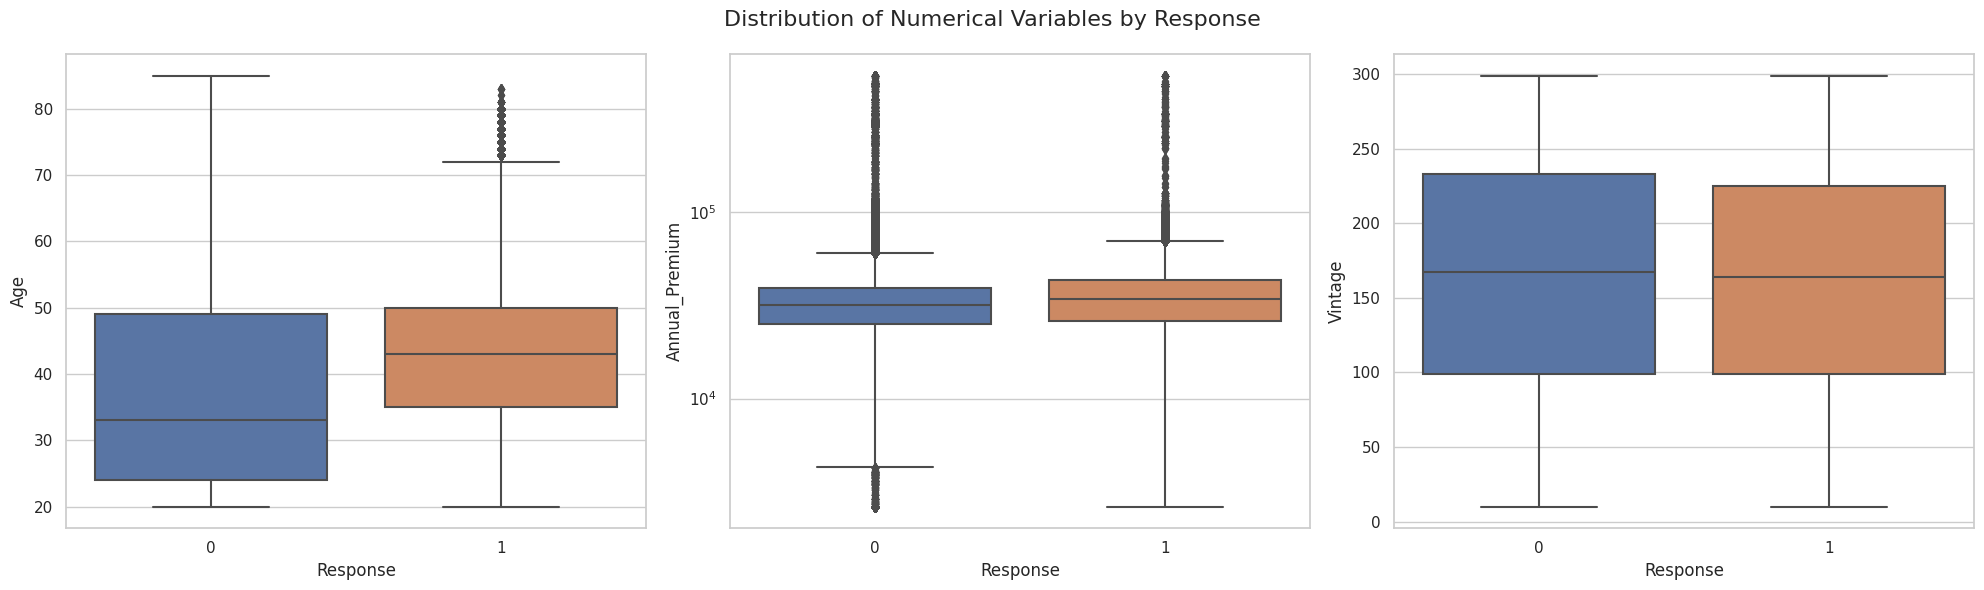

In [68]:
# Create the figure and subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Distribution of Numerical Variables by Response', fontsize=16)

# Create a box plot for each numerical column
for i, col in enumerate(num_cols):
    sns.boxplot(x='Response', y=col, data=train, ax=axes[i])
    axes[i].set_xlabel('Response')
    axes[i].set_ylabel(col)

# Adjust layout and display the plot
axes[1].set_yscale('log')
plt.tight_layout()
plt.show()

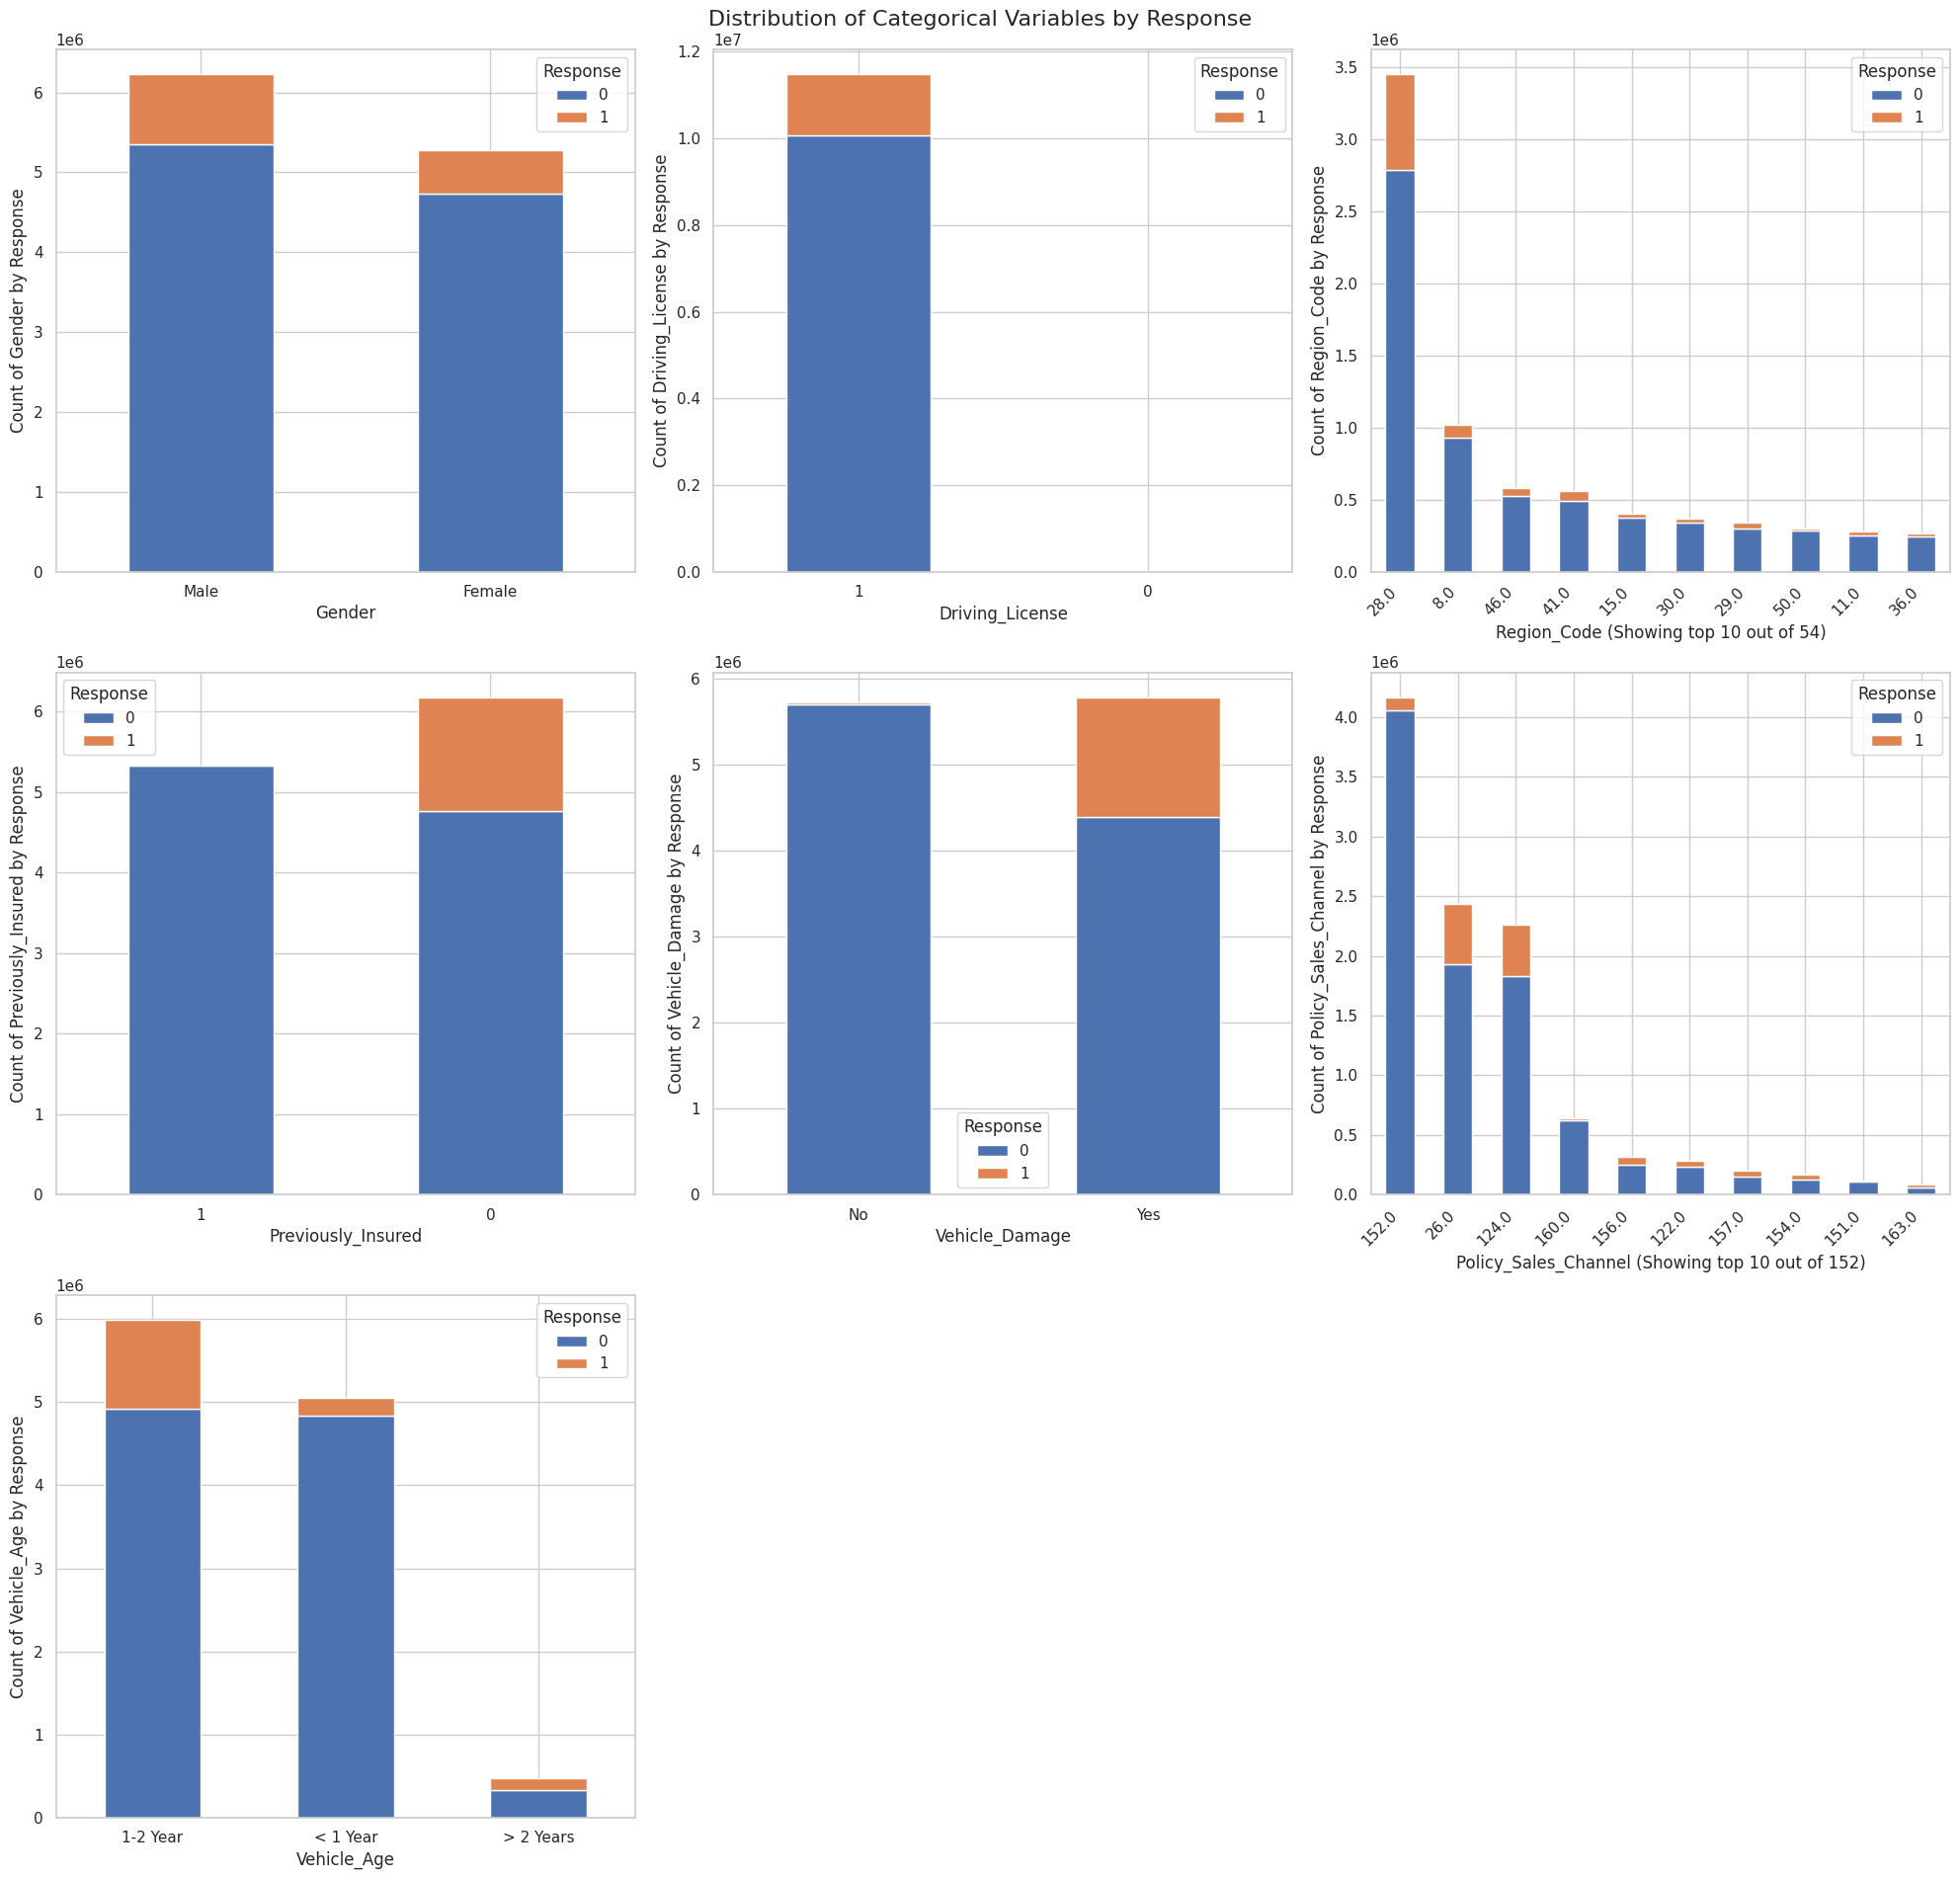

In [72]:
combined_cols = cat_cols + ordinal_cols

# Create the figure and subplots
fig, axes = plt.subplots(3, 3, figsize=(20, 20))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Filter Top N if too many categories
top_N = 10

# Create a stacked bar chart for each column
for i, col in enumerate(combined_cols):
    # Get the top 10 categories
    top_categories = train[col].value_counts().nlargest(top_N).index.to_list()
    
    # Filter the data and reset the category levels
    data = train[train[col].isin(top_categories)].copy()
    data[col] = data[col].cat.remove_unused_categories()

    # Calculate counts
    count_data = data.groupby([col, target]).size().unstack(fill_value=0)
    
    # Sort the data by total count
    count_data = count_data.sort_values(by=count_data.columns.tolist(), ascending=False)

    # Plot counts
    count_data.plot(kind='bar', stacked=True, ax=axes[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel(f'Count of {col} by {target}')

    # Add a note about top 10 categories if applicable
    if train[col].nunique() > top_N:
        # Rotate x-axis labels
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
        # axes[i].text(0.5, -0.20, f'Showing top {top_N} out of {train[col].nunique()} categories', 
        #              ha='center', va='center', transform=axes[i].transAxes, fontsize=10)
        axes[i].set_xlabel(f'{col} (Showing top {top_N} out of {train[col].nunique()})')
    else:
        # Rotate x-axis labels
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=0, ha='center')

# Remove the extra subplots
for j in range(i+1, 9):
    axes[j].axis('off')

# Add an overall title to the figure
fig.suptitle('Distribution of Categorical Variables by Response', fontsize=16, y=0.95)

# Adjust layout and display the plot
plt.tight_layout()
plt.subplots_adjust(top=0.93)  # Adjust the top margin to accommodate the suptitle
plt.show()